<a href="https://colab.research.google.com/github/pavel7479/AvitoTech/blob/master/hockey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка Базы данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# загружаем данные
excel_data = pd.read_excel('/content/drive/MyDrive/Диплом Мой AI/Data/Новый сайт, данные/hockey.xlsx', sheet_name = 0)
excel_data.head()


,A,B,Data,bet_win,bet_draw,bet_loss,game score A,game score B,period 1 score A,period 1 score B,...,B_п.2 Блокировано бросков,B_п.2 Отраженные броски,B_п.2 Отраженные броски (%),B_п.2 Удаления,B_п.2 Штрафное время,B_п.2 Силовые приемы,B_п.2 Выигранные вбрасывания,B_п.2 Вбрасывания (%),B_п.2 Шайбы в большинстве,B_п.2 Шайбы в меньшинстве
0,Спартак Москва,ХК Сочи,07.12.23,1.456,5.24,5.930,4,3,0,1,...,8,12,92.31,2,4,2,7,43.75,1,0
1,Северсталь,Динамо Москва,07.12.23,3.020,3.96,2.160,1,1,0,0,...,1,12,100.00,1,2,6,15,65.22,1,0
2,Локомотив,Ак Барс,07.12.23,2.152,3.72,3.184,3,1,0,1,...,4,14,100.00,1,2,8,9,34.62,0,0
3,Витязь,ЦСКА,07.12.23,4.360,4.26,1.715,1,4,0,2,...,2,6,85.71,0,0,7,9,60.00,0,0
4,Лада,Нефтехимик,07.12.23,2.325,3.71,2.870,3,0,0,0,...,3,4,80.00,1,2,1,7,58.33,0,0


In [ ]:
excel_data.shape

(107, 60)

# Функция для упрощённой работы с базой данных для обучения

In [ ]:
def preparing_data_for_applying_for_training(excel_data_data):
    # маркируем домашнюю команду 0, гостевую 1
    excel_data['A'] = 0.0
    excel_data['B'] = 1.0

    # вставляем столбец с целевыми значениями 0 - проиграл, 1 - ничья, 2 - выиграл
    # Определяем условия для сравнения
    conditions = [(excel_data['game score A'] < excel_data['game score B']), (excel_data['game score A'] == excel_data['game score B']), (excel_data['game score A'] > excel_data['game score B'])]

    # Определяем значения, которые будут присвоены в зависимости от условий
    values = [0.0, 1.0, 2.0]

    # Создаем новый столбец 'Win'
    excel_data['Win'] = np.select(conditions, values, default=-1.0) # В результате новый столбец 'Win' будет заполнен значениями в зависимости от сравнения

    # Создание копий столбцов, которые будут исключены из нормализации. И сброс их индексов
    win_column = excel_data['Win'].copy().reset_index(drop=True)
    a_column = excel_data['A'].copy().reset_index(drop=True)
    b_column = excel_data['B'].copy().reset_index(drop=True)

    # Удаление столбцов, которые не будут нормализованы
    columns_to_normalize = excel_data.drop(['Win'], axis=1)

    # Нормализация данных
    scaler = MinMaxScaler()
    df_normalized_val = pd.DataFrame(scaler.fit_transform(columns_to_normalize), columns = columns_to_normalize.columns)

    # Добавление столбцов обратно к нормализованным данным
    df_normalized_val['Win'] = win_column
    df_normalized_val['A'] = a_column
    df_normalized_val['B'] = b_column

    # Удаляем результат всего матча это столбцы game score A и game score B
    df_normalized_val.drop(['game score A', 'game score B'], axis = 1, inplace=True)

    # Возврат нормализованной таблицы
    return df_normalized_val


# Создание теринровочной и валидационной выборки

In [ ]:
# @title Создание тренировочного набора
df_normalized_val = preparing_data_for_applying_for_training(excel_data)
# поместим в X_train все кроме столбца Win
X_train = df_normalized_val.drop('Win', axis = 1)

# столбец 'Win' станет нашей целевой переменной (y_train)
y_train = df_normalized_val['Win']

print(X_train.shape)
print(y_train.shape)

ValueError: ignored

In [ ]:
# @title Разделение данных на тренировочный и валидационный наборы

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print("------------------")

# @title Перевод в Numpay массив
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(125, 22)
(125,)
(32, 22)
(32,)
------------------
(125, 22)
(125,)
(32, 22)
(32,)


# Нейросеть Dence

In [ ]:
# @title Создание и тренирровка НС на Dence

from keras.regularizers import l1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Create the neural network model
model = Sequential()
model.add(Dense(2000, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=0.25))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='ReLU'))
model.add(Dense(500, activation='tanh'))
model.add(Dropout(rate=0.25))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(3, activation='softmax')) # заменить на softmax, тогда сумма предсказаний будет равна 1

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=24, validation_split=0.2)
# Оценка модели
loss, accuracy, = model.evaluate(X_train, y_train)
print("Точность на тестовом наборе:", accuracy)

Epoch 1/50
6/6 [==============================] - 3s 93ms/step - loss: 1.2448 - accuracy: 0.3360 - val_loss: 1.0144 - val_accuracy: 0.4688
Epoch 2/50
6/6 [==============================] - 0s 28ms/step - loss: 1.1977 - accuracy: 0.2960 - val_loss: 1.0962 - val_accuracy: 0.3750
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 1.0807 - accuracy: 0.4560 - val_loss: 1.1677 - val_accuracy: 0.3750
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 1.0862 - accuracy: 0.4560 - val_loss: 1.0747 - val_accuracy: 0.3750
Epoch 5/50
6/6 [==============================] - 0s 44ms/step - loss: 1.0773 - accuracy: 0.4560 - val_loss: 1.0640 - val_accuracy: 0.3750
Epoch 6/50
6/6 [==============================] - 0s 40ms/step - loss: 1.0742 - accuracy: 0.4560 - val_loss: 1.1365 - val_accuracy: 0.3750
Epoch 7/50
6/6 [==============================] - 0s 36ms/step - loss: 1.0663 - accuracy: 0.4560 - val_loss: 1.0688 - val_accuracy: 0.3750
Epoch 8/50
6/6 [===========

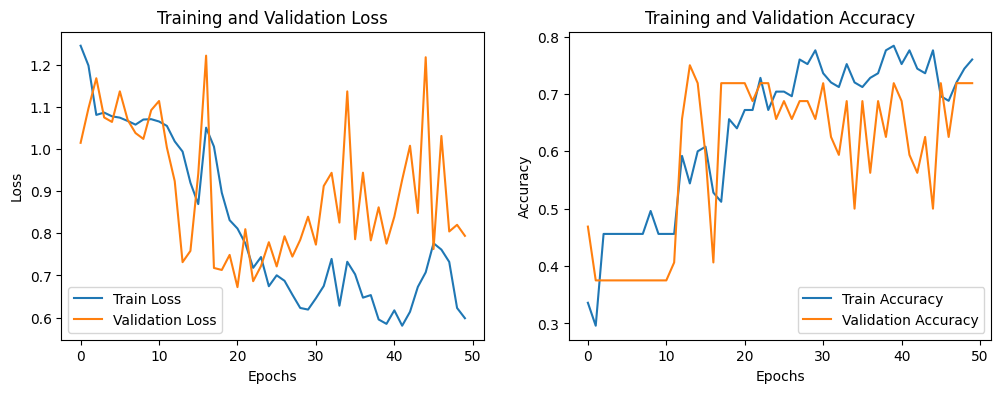

In [ ]:

# @title Выводим графики

import matplotlib.pyplot as plt
# Выводим графики обучения
plt.figure(figsize=(12, 4))

# График функции потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


5/5 [==============================] - 0s 10ms/step


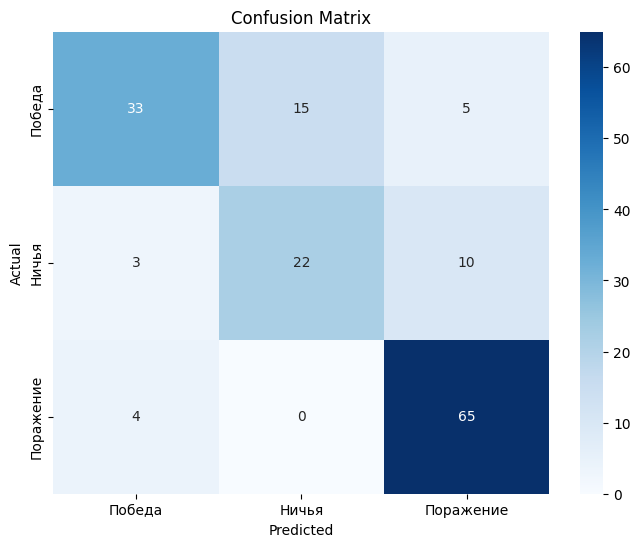

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.62      0.71        53
         1.0       0.59      0.63      0.61        35
         2.0       0.81      0.94      0.87        69

    accuracy                           0.76       157
   macro avg       0.74      0.73      0.73       157
weighted avg       0.77      0.76      0.76       157



In [ ]:
# @title Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Предсказания модели
predictions = model.predict(X_train)

# Получение меток классов (аргмакс для softmax)
predicted_labels = np.argmax(predictions, axis=1)

# Расчет confusion matrix
cm = confusion_matrix(y_train, predicted_labels)

# Визуализация с использованием seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Победа', 'Ничья', 'Поражение'], yticklabels=['Победа', 'Ничья', 'Поражение'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_train, predicted_labels))


In [ ]:
# @title Сохранение модели в файл

model.save('my_model.h5')

# Сохранение истории обучения в файл (если вам нужно)
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# НС на LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout

# Предположим, что X_train имеет форму (количество примеров, количество временных шагов, количество признаков)
# Например, (samples, time_steps, features)
# Также, предположим, что X_train представляет временной ряд
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(Dense(200, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'))
model.add(Dropout(rate=0.3))
model.add(Dense(100, activation='relu'))
model.add(LSTM(200, return_sequences=True))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Оценка модели
loss, accuracy, = model.evaluate(X_train, y_train)
print("Точность на тестовом наборе:", accuracy)

Epoch 1/50
4/4 [==============================] - 6s 285ms/step - loss: 1.0991 - accuracy: 0.3000 - val_loss: 1.0911 - val_accuracy: 0.3200
Epoch 2/50
4/4 [==============================] - 0s 77ms/step - loss: 1.0915 - accuracy: 0.3700 - val_loss: 1.0999 - val_accuracy: 0.3200
Epoch 3/50
4/4 [==============================] - 0s 79ms/step - loss: 1.0823 - accuracy: 0.3900 - val_loss: 1.0844 - val_accuracy: 0.3200
Epoch 4/50
4/4 [==============================] - 0s 92ms/step - loss: 1.0783 - accuracy: 0.3700 - val_loss: 1.0857 - val_accuracy: 0.3200
Epoch 5/50
4/4 [==============================] - 0s 96ms/step - loss: 1.1011 - accuracy: 0.3800 - val_loss: 1.0746 - val_accuracy: 0.3600
Epoch 6/50
4/4 [==============================] - 0s 81ms/step - loss: 1.0784 - accuracy: 0.5300 - val_loss: 1.0857 - val_accuracy: 0.4000
Epoch 7/50
4/4 [==============================] - 0s 94ms/step - loss: 1.0828 - accuracy: 0.4400 - val_loss: 1.0960 - val_accuracy: 0.3200
Epoch 8/50
4/4 [==========

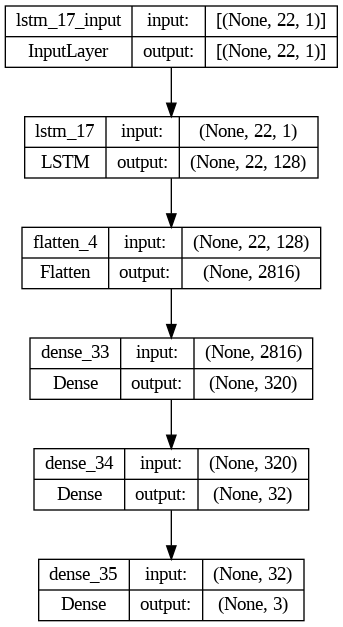

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


4/4 [==============================] - 1s 34ms/step


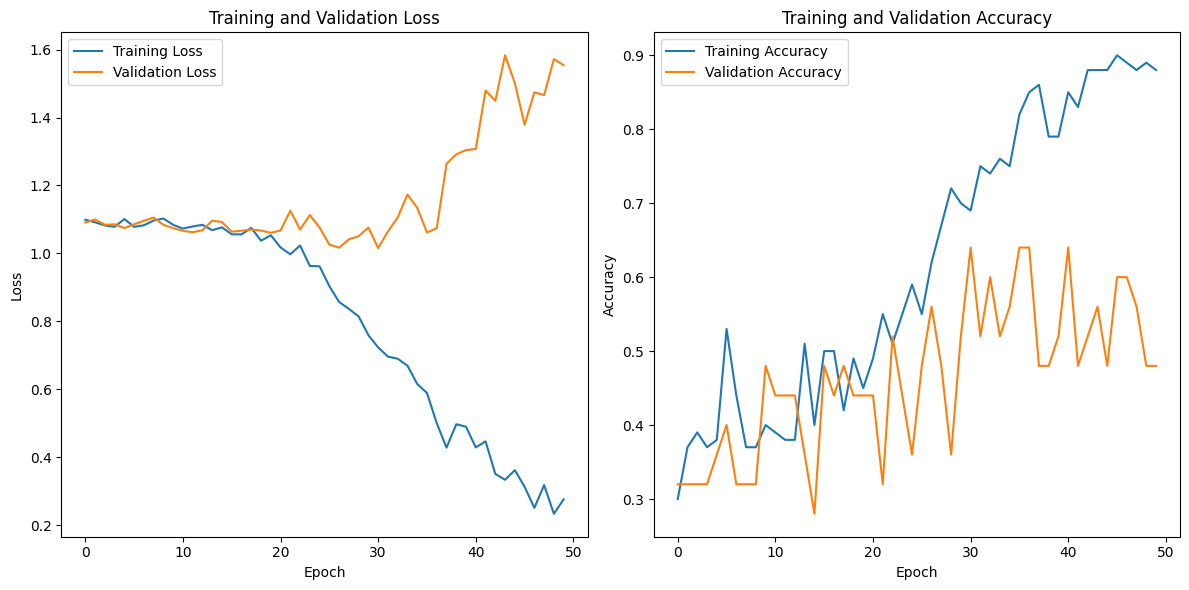

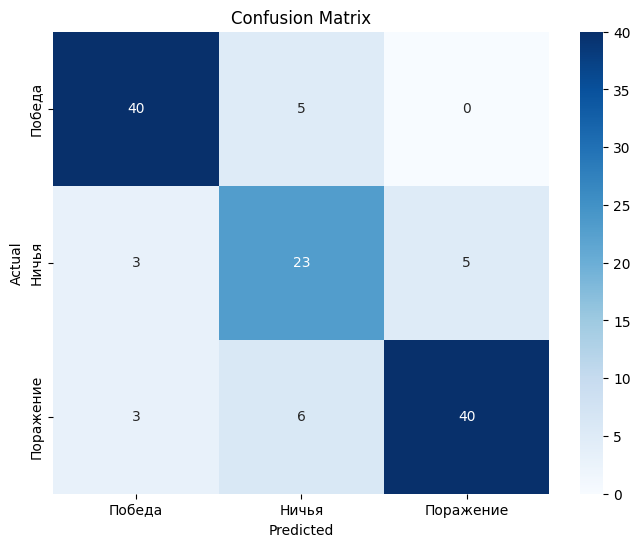

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        45
         1.0       0.68      0.74      0.71        31
         2.0       0.89      0.82      0.85        49

    accuracy                           0.82       125
   macro avg       0.81      0.82      0.81       125
weighted avg       0.83      0.82      0.83       125



In [ ]:
# @title Выводим графики
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Создание функции для визуализации истории обучения
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # График функции потерь
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Преобразование тестовых данных, как было сделано при обучении
X_test = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Получение предсказаний модели
predictions = model.predict(X_test)

# Отображение истории обучения
plot_training_history(history)

# Расчет и отображение Confusion Matrix
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_train, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Победа', 'Ничья', 'Поражение'], yticklabels=['Победа', 'Ничья', 'Поражение'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_train, predicted_labels))


In [ ]:
# @title Сохранение модели в файл

model.save('my_model.h5')

# Сохранение истории обучения в файл (если вам нужно)
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Упрощённая работ а сбазой данных для подачи в Predict
# <font color='red'> <font size="+1.5">Эту функцию надо будет переписать при реальном, а не тестовом предсказании матча т.к. столбца Win не будет, матч ещё не доигран
</font>

In [ ]:
def preparing_data_for_applying_for_predict(predict_data):
    # маркируем домашнюю команду 0, гостевую 1
    predict_data['A'] = 0.0
    predict_data['B'] = 1.0

    # # вставляем столбец с целевыми значениями 0 - проиграл, 1 - ничья, 2 - выиграл
    # # Определяем условия для сравнения
    # conditions = [(predict_data['game score A'] < predict_data['game score B']), (predict_data['game score A'] == predict_data['game score B']), (predict_data['game score A'] > predict_data['game score B'])]

    # # Определяем значения, которые будут присвоены в зависимости от условий
    # values = [0.0, 1.0, 2.0]

    # # Создаем новый столбец 'Win'
    # predict_data['Win'] = np.select(conditions, values, default=-1.0) # В результате новый столбец 'Win' будет заполнен значениями в зависимости от сравнения


    # # Создание копий столбцов, которые будут исключены из нормализации. И сброс их индексов
    # win_column = predict_data['Win'].copy().reset_index(drop=True)
    a_column = predict_data['A'].copy().reset_index(drop=True)
    b_column = predict_data['B'].copy().reset_index(drop=True)

    # # Удаление столбцов, которые не будут нормализованы
    # columns_to_normalize = predict_data.drop(['Win'], axis=1)

    # Удаляем результат всего матча это столбцы game score A и game score B
    predict_data.drop(['game score A', 'game score B'], axis = 1, inplace=True)

    # # Нормализация данных
    scaler = MinMaxScaler()
    predict_data = pd.DataFrame(scaler.fit_transform(predict_data), columns=predict_data.columns)

# df_predict = pd.DataFrame(scaler.fit_transform(columns_to_normalize), columns = columns_to_normalize.columns)
    # # Добавление столбцов обратно к нормализованным данным
    # df_predict['Win'] = win_column
    predict_data['A'] = a_column
    predict_data['B'] = b_column

    # Возврат нормализованной таблицы
    return predict_data


In [ ]:
# загружаем данные
predict_data = pd.read_excel('/content/Predickt.xlsx', sheet_name = 0)
predict_data.head()

,A,B,game score A,game score B,1 first half score A,1 first half score B,1 shots on target A,1 shots on target B,1 removal A,1 removal B,...,2 first half score A,2 first half score B,2 shots on target A,2 shots on target B,2 removal A,2 removal B,2 power moves A,2 power moves B,2 faceoffs won A,2 faceoffs won B
0,Топедо,Локомотив,2,2,0,0,11,15,0,0,...,0,0,10,13,8,6,5,0,10,14
1,ЦСКА,Динамо Минск,5,3,2,2,8,12,2,0,...,2,1,11,15,6,2,2,8,9,12
2,Амур,Адмирал,2,2,0,0,7,6,2,2,...,0,1,9,10,4,2,3,4,14,13
3,Сибирь,Северсталь,1,2,0,1,6,10,4,4,...,1,0,12,6,4,0,11,0,6,6
4,Нефтехимик,Металлург Магнитогорск,3,3,0,0,11,11,2,0,...,3,1,13,9,2,0,9,5,7,13


In [ ]:
# @title Подготовка данных и нормализация

predict_data = preparing_data_for_applying_for_predict(predict_data)

In [ ]:
predict_data.shape

(5, 22)

In [ ]:
predict_data

,A,B,1 first half score A,1 first half score B,1 shots on target A,1 shots on target B,1 removal A,1 removal B,1 power moves A,1 power moves B,...,2 first half score A,2 first half score B,2 shots on target A,2 shots on target B,2 removal A,2 removal B,2 power moves A,2 power moves B,2 faceoffs won A,2 faceoffs won B
0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.666667,1.0,...,0.000000,0.0,0.25,0.777778,1.000000,1.000000,0.333333,0.000,0.500,1.000
1,0.0,1.0,1.0,1.0,0.4,0.666667,0.5,0.0,0.000000,1.0,...,0.666667,1.0,0.50,1.000000,0.666667,0.333333,0.000000,1.000,0.375,0.750
2,0.0,1.0,0.0,0.0,0.2,0.000000,0.5,0.5,1.000000,0.2,...,0.000000,1.0,0.00,0.444444,0.333333,0.333333,0.111111,0.500,1.000,0.875
3,0.0,1.0,0.0,0.5,0.0,0.444444,1.0,1.0,0.666667,0.2,...,0.333333,0.0,0.75,0.000000,0.333333,0.000000,1.000000,0.000,0.000,0.000
4,0.0,1.0,0.0,0.0,1.0,0.555556,0.5,0.0,0.333333,0.0,...,1.000000,1.0,1.00,0.333333,0.000000,0.000000,0.777778,0.625,0.125,0.875


# Проверка работы

In [ ]:
# @title Загрузка модели
from tensorflow.keras.models import load_model

model = load_model('/content/my_model.h5')


In [ ]:
# @title Получение предсказания

# Предположим, что у вас есть данные test_data
predictions = model.predict(predict_data)
print(predictions)


1/1 [==============================] - 0s 115ms/step
[[0.04779479 0.11694807 0.8352572 ]
 [0.37386248 0.58555657 0.040581  ]
 [0.9475149  0.03226259 0.02022252]
 [0.9319232  0.03941438 0.02866239]
 [0.04962813 0.12672792 0.823644  ]]
